<a href="https://colab.research.google.com/github/dev-tusha-soni/Covid-19-Data-Analysis/blob/main/R1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

# Upload the file
uploaded = files.upload()



Saving time_series_covid19_confirmed_global.csv to time_series_covid19_confirmed_global.csv


In [ ]:
# List files in the current directory
!ls


sample_data  time_series_covid19_confirmed_global.csv


In [4]:
# Import the pandas library
import pandas as pd

# Load the dataset
file_path = "time_series_covid19_confirmed_global.csv"  # Use the correct file path
covid_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(covid_data.head())


  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/12/20  4/13/20  4/14/20  4/15/20  \
0        0        0        0  ...      607      665      714      784   
1        0        0        0  ...      446      467      475      494   
2        0        0        0  ...     1914     1983     2070     2160   
3        0        0        0  ...      638      646      659      673   
4        0        0        0  ...       19       19       19       19   

   4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  
0      840      906   

In [5]:
print("Column Names:")
print(covid_data.columns)


Column Names:
Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/

In [6]:
# Check for missing values
print("Missing Values in Each Column:")
print(covid_data.isnull().sum())


Missing Values in Each Column:
Province/State    182
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/17/20             0
4/18/20             0
4/19/20             0
4/20/20             0
4/21/20             0
Length: 95, dtype: int64


In [7]:
# Rename columns for easier access
covid_data = covid_data.rename(columns={"Country/Region": "Country", "Province/State": "Province"})
print("Renamed Columns:")
print(covid_data.columns)


Renamed Columns:
Index(['Province', 'Country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10

In [8]:
# Reshape data to long format
covid_data_long = covid_data.melt(
    id_vars=["Province", "Country", "Lat", "Long"],
    var_name="Date",
    value_name="Cumulative Cases"
)
covid_data_long["Date"] = pd.to_datetime(covid_data_long["Date"])
print("Reshaped Data:")
print(covid_data_long.head())


Reshaped Data:
  Province      Country      Lat     Long       Date  Cumulative Cases
0      NaN  Afghanistan  33.0000  65.0000 2020-01-22                 0
1      NaN      Albania  41.1533  20.1683 2020-01-22                 0
2      NaN      Algeria  28.0339   1.6596 2020-01-22                 0
3      NaN      Andorra  42.5063   1.5218 2020-01-22                 0
4      NaN       Angola -11.2027  17.8739 2020-01-22                 0


<ipython-input-8-7c39eba96062>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid_data_long["Date"] = pd.to_datetime(covid_data_long["Date"])


In [9]:
# Calculate daily new cases
covid_data_long["New Cases"] = covid_data_long.groupby("Country")["Cumulative Cases"].diff().fillna(0)
print("Data with New Cases:")
print(covid_data_long.head())


Data with New Cases:
  Province      Country      Lat     Long       Date  Cumulative Cases  \
0      NaN  Afghanistan  33.0000  65.0000 2020-01-22                 0   
1      NaN      Albania  41.1533  20.1683 2020-01-22                 0   
2      NaN      Algeria  28.0339   1.6596 2020-01-22                 0   
3      NaN      Andorra  42.5063   1.5218 2020-01-22                 0   
4      NaN       Angola -11.2027  17.8739 2020-01-22                 0   

   New Cases  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  


In [10]:
# Group data by Country and calculate total cases
summary_stats = covid_data_long.groupby("Country")["Cumulative Cases"].max().reset_index()
summary_stats = summary_stats.rename(columns={"Cumulative Cases": "Total Cases"})

# Display the summary
print("Summary Statistics:")
print(summary_stats.sort_values(by="Total Cases", ascending=False).head())


Summary Statistics:
     Country  Total Cases
171       US       823786
156    Spain       204178
84     Italy       183957
61    France       158050
65   Germany       148291


In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(india_data["Date"], india_data["New Cases"], label="New Cases", color="blue")
plt.title("Daily New Cases in India Over Time")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'india_data' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
print(summary_stats.columns)


Index(['Country', 'Total Cases'], dtype='object')


In [ ]:
print(covid_data.columns)


Index(['Province', 'Country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)


In [ ]:
# Reshape data
covid_long = covid_data.melt(
    id_vars=['Province', 'Country', 'Lat', 'Long'],  # Columns to keep
    var_name='Date',                                # New column for date
    value_name='Cases'                              # New column for case counts
)

# Convert 'Date' to a datetime object
covid_long['Date'] = pd.to_datetime(covid_long['Date'])

# Preview the reshaped data
print(covid_long.head())


  Province      Country       Lat       Long       Date  Cases
0      NaN  Afghanistan  33.93911  67.709953 2020-01-22      0
1      NaN      Albania  41.15330  20.168300 2020-01-22      0
2      NaN      Algeria  28.03390   1.659600 2020-01-22      0
3      NaN      Andorra  42.50630   1.521800 2020-01-22      0
4      NaN       Angola -11.20270  17.873900 2020-01-22      0


<ipython-input-22-2dee433a3d78>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid_long['Date'] = pd.to_datetime(covid_long['Date'])


In [ ]:
# Aggregate cumulative cases by country
summary_stats = covid_long.groupby('Country').agg(
    Total_Cases=('Cases', 'sum'),
    Avg_Lat=('Lat', 'mean'),
    Avg_Long=('Long', 'mean')
).reset_index()

# Preview the summary statistics
print(summary_stats.head())


       Country  Total_Cases   Avg_Lat   Avg_Long
0  Afghanistan    129988469  33.93911  67.709953
1      Albania    185562654  41.15330  20.168300
2      Algeria    182741650  28.03390   1.659600
3      Andorra     24547525  42.50630   1.521800
4       Angola     60025203 -11.20270  17.873900


In [12]:
# Get the top 10 countries by total cases
top_countries = summary_stats.sort_values(by="Total_Cases", ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_countries["Country"], top_countries["Total_Cases"], color="skyblue")
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Total_Cases'

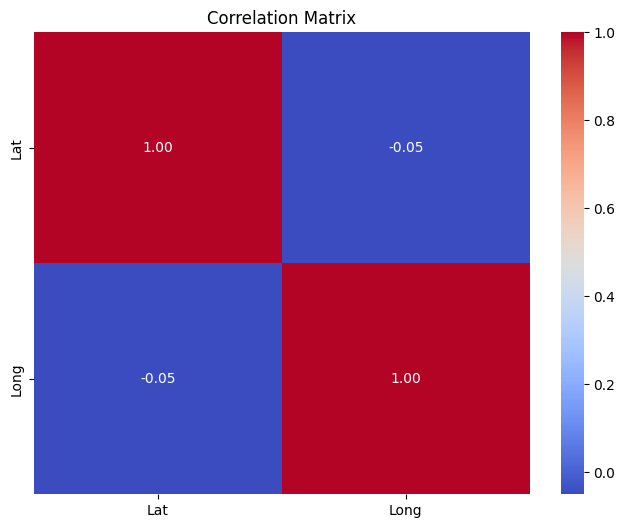

In [ ]:
# Calculate correlation matrix
correlation_matrix = covid_data[["Lat", "Long"]].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
covid_data_long.to_csv("processed_covid_data.csv", index=False)
print("Processed data saved as 'processed_covid_data.csv'")


Processed data saved as 'processed_covid_data.csv'


In [ ]:
plt.savefig("top_10_countries_total_cases.png")
print("Plot saved as 'top_10_countries_total_cases.png'")


Plot saved as 'top_10_countries_total_cases.png'


<Figure size 640x480 with 0 Axes>

In [ ]:
# Extract year from the Date column
covid_data_long["Year"] = covid_data_long["Date"].dt.year

# Filter for a specific year, e.g., 2020
data_2020 = covid_data_long[covid_data_long["Year"] == 2020]
print("Data for 2020:")
print(data_2020.head())


Data for 2020:
  Province      Country       Lat       Long       Date  Cumulative Cases  \
0      NaN  Afghanistan  33.93911  67.709953 2020-01-22                 0   
1      NaN      Albania  41.15330  20.168300 2020-01-22                 0   
2      NaN      Algeria  28.03390   1.659600 2020-01-22                 0   
3      NaN      Andorra  42.50630   1.521800 2020-01-22                 0   
4      NaN       Angola -11.20270  17.873900 2020-01-22                 0   

   New Cases  Year  
0        0.0  2020  
1        0.0  2020  
2        0.0  2020  
3        0.0  2020  
4        0.0  2020  


In [ ]:
# Filter data for a specific country, e.g., India
india_data = covid_data_long[covid_data_long["Country"] == "India"]
print("India's Data:")
print(india_data.head())


India's Data:
     Province Country        Lat      Long       Date  Cumulative Cases  \
148       NaN   India  20.593684  78.96288 2020-01-22                 0   
437       NaN   India  20.593684  78.96288 2020-01-23                 0   
726       NaN   India  20.593684  78.96288 2020-01-24                 0   
1015      NaN   India  20.593684  78.96288 2020-01-25                 0   
1304      NaN   India  20.593684  78.96288 2020-01-26                 0   

      New Cases  Year  
148         0.0  2020  
437         0.0  2020  
726         0.0  2020  
1015        0.0  2020  
1304        0.0  2020  


In [ ]:
print("Number of rows and columns:", covid_data.shape)

Number of rows and columns: (289, 1147)


In [ ]:
print(covid_data.columns)


Index(['Province', 'Country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)


In [ ]:
print(covid_data_long.columns)


Index(['Province', 'Country', 'Lat', 'Long', 'Date', 'Cumulative Cases',
       'New Cases', 'Year'],
      dtype='object')


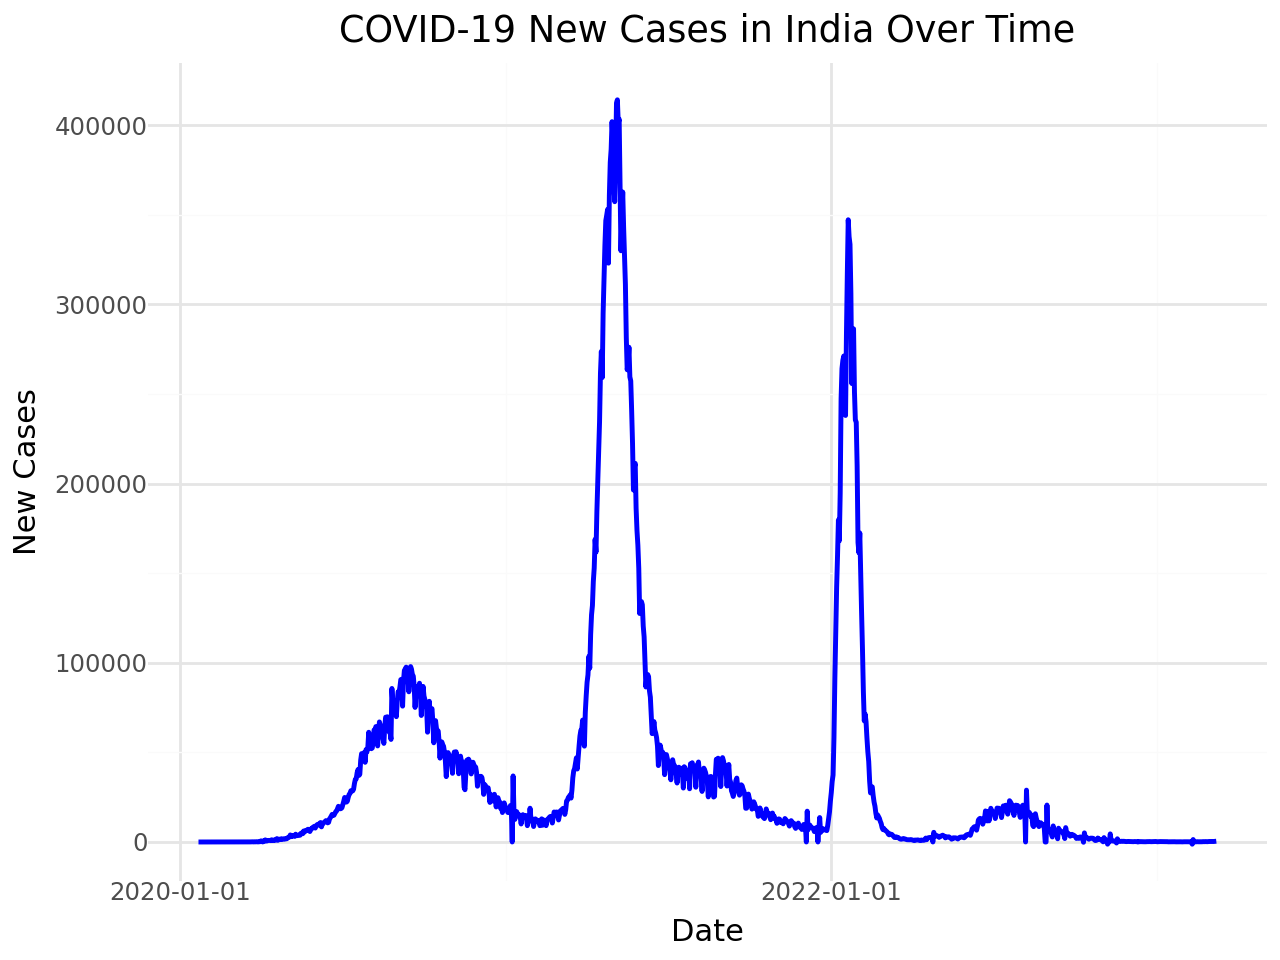

In [ ]:
from plotnine import ggplot, aes, geom_line, labs, theme_minimal
from plotnine import element_text

# Filter data for India (you can change this to any other country)
india_data = covid_data_long[covid_data_long['Country'] == 'India']

# Create a line plot for New Cases
line_plot_new_cases = (
    ggplot(india_data, aes(x='Date', y='New Cases')) +  # Use 'New Cases' column
    geom_line(color='blue', size=1) +  # Line color and thickness
    labs(
        title="COVID-19 New Cases in India Over Time",
        x="Date",
        y="New Cases"
    ) +
    theme_minimal()
)

# Display the plot
from IPython.display import display
display(line_plot_new_cases)


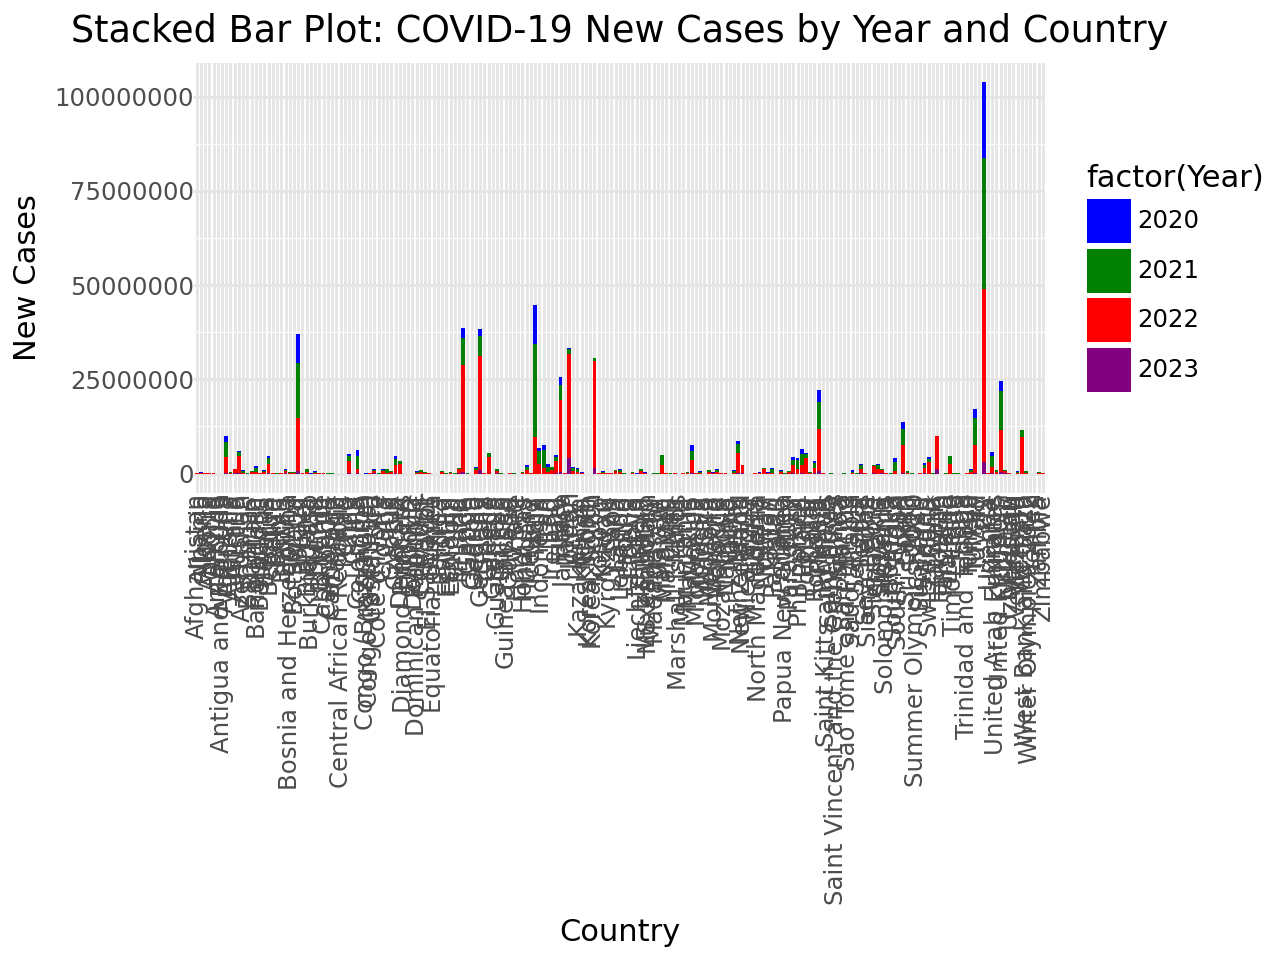

In [ ]:
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, scale_fill_manual
from plotnine import theme, element_text

# Summarize the data by year and country
yearly_data = covid_data_long.groupby(['Country', 'Year']).agg({'New Cases': 'sum'}).reset_index()

# Create a stacked bar plot for New Cases by Year and Country
stacked_bar_plot = (
    ggplot(yearly_data, aes(x='Country', y='New Cases', fill='factor(Year)')) +  # Group by Year
    geom_bar(stat='identity') +  # Stacked bar plot
    labs(
        title="Stacked Bar Plot: COVID-19 New Cases by Year and Country",
        x="Country",
        y="New Cases"
    ) +
    theme_minimal() +
    theme(axis_text_x=element_text(rotation=90)) +  # Rotate country names for better readability
    scale_fill_manual(values=['blue', 'green', 'red', 'purple', 'orange'])  # Custom color palette
)

# Display the plot
from IPython.display import display
display(stacked_bar_plot)
